# Probability Assignment (Quinn Zhang)

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis. 


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others. 

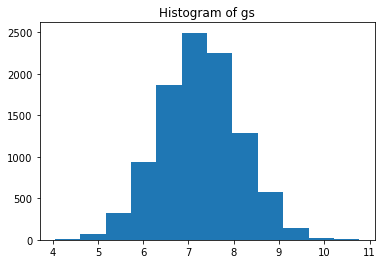

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate array of 10000 values that follow normal distribution with mean=7.25 and sd=0.875
gs = np.random.normal(loc=7.25, scale=0.875, size=10000)

plt.hist(gs, bins=12)
plt.title("Histogram of gs")
plt.show()

## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots. 



          0         1         2
0  1.000000  0.588785 -0.897756
1  0.588785  1.000000 -0.481854
2 -0.897756 -0.481854  1.000000


array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

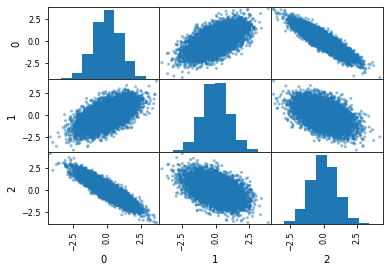

In [2]:
from scipy.stats import multivariate_normal
import seaborn as sns

# the Sigma for our distribution
Sigma = np.array([[1.0, 0.6, -0.9],
        [0.6, 1.0, -0.5],
        [-0.9, -0.5, 1.0]])

# sample from the multivariate normal distribution
APT = np.random.multivariate_normal([0, 0, 0], Sigma, 10000)
APT
# find the correlation among the columns
data = pd.DataFrame(APT)
print(data.corr())

pd.plotting.scatter_matrix(data)

## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

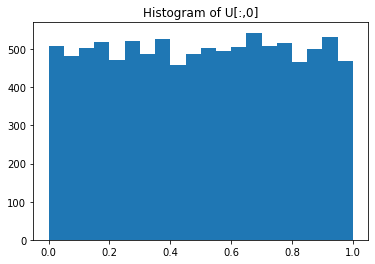

          0         1         2
0  1.000000  0.571871 -0.889118
1  0.571871  1.000000 -0.464558
2 -0.889118 -0.464558  1.000000


array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>]], dtype=object)

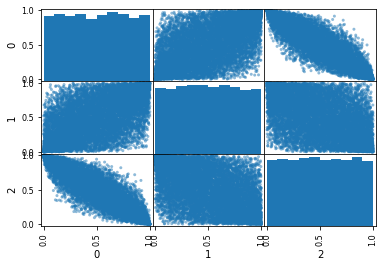

In [3]:
# apply the CDF for the normal distribution and make the uniform distributions
U = scipy.stats.norm.cdf(APT)
plt.hist(U[:,0], bins=20)
plt.title("Histogram of U[:,0]")
plt.show()

data_u = pd.DataFrame(U)
print(data_u.corr())
pd.plotting.scatter_matrix(data_u)

## Question 1d (20 points)

Perform the inverse transform sampling.

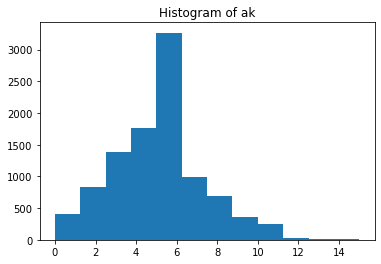

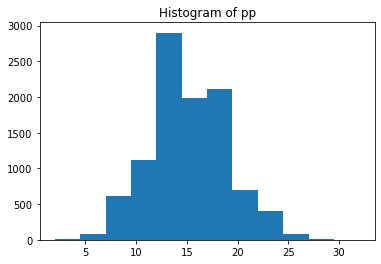

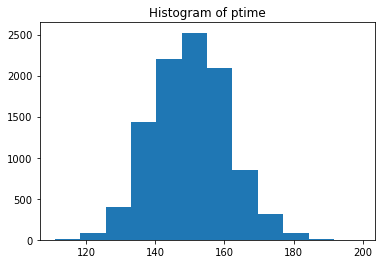

In [4]:
# applying the quantile function
# make ak a Poisson distribution with an average number of air knots of 5 per case
ak = scipy.stats.poisson.ppf(U[:, 0], 5)
plt.hist(ak, bins=12)
plt.title("Histogram of ak")
plt.show()

# make pp a Poisson distribution with a mean of 15 “passing point” happening per case
pp = scipy.stats.poisson.ppf(U[:, 1], 15)
plt.hist(pp, bins=12)
plt.title("Histogram of pp")
plt.show()

# make ptime a Normal distribution with a mean of 120 and standard deviation of 30
ptime = scipy.stats.poisson.ppf(U[:, 2], 120, 30)
plt.hist(ptime, bins=12)
plt.title("Histogram of ptime")
plt.show()

## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


0.5794111568171129
-0.8818028302855484
-0.4793186774957618
0.013691939965675415
0.012686481298128674
-0.013995129248760117


array([[<AxesSubplot:xlabel='ak', ylabel='ak'>,
        <AxesSubplot:xlabel='pp', ylabel='ak'>,
        <AxesSubplot:xlabel='ptime', ylabel='ak'>,
        <AxesSubplot:xlabel='gs', ylabel='ak'>],
       [<AxesSubplot:xlabel='ak', ylabel='pp'>,
        <AxesSubplot:xlabel='pp', ylabel='pp'>,
        <AxesSubplot:xlabel='ptime', ylabel='pp'>,
        <AxesSubplot:xlabel='gs', ylabel='pp'>],
       [<AxesSubplot:xlabel='ak', ylabel='ptime'>,
        <AxesSubplot:xlabel='pp', ylabel='ptime'>,
        <AxesSubplot:xlabel='ptime', ylabel='ptime'>,
        <AxesSubplot:xlabel='gs', ylabel='ptime'>],
       [<AxesSubplot:xlabel='ak', ylabel='gs'>,
        <AxesSubplot:xlabel='pp', ylabel='gs'>,
        <AxesSubplot:xlabel='ptime', ylabel='gs'>,
        <AxesSubplot:xlabel='gs', ylabel='gs'>]], dtype=object)

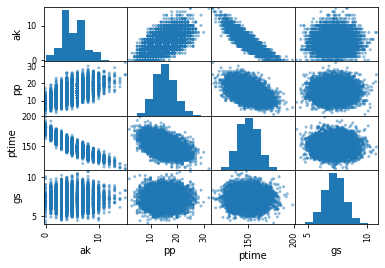

In [5]:
# check original desired correlations hold up
ak_pp = np.corrcoef(ak, pp)
print(ak_pp[0,1])
ak_ptime = np.corrcoef(ak, ptime)
print(ak_ptime[0,1])
pp_ptime = np.corrcoef(pp, ptime)
print(pp_ptime[0,1])
gs_ak = np.corrcoef(gs, ak)
print(gs_ak[0,1])
gs_pp = np.corrcoef(gs, pp)
print(gs_pp[0,1])
gs_ptime = np.corrcoef(gs, ptime)
print(gs_ptime[0,1])

# visualize their correlations
aLL = {'ak': ak, 'pp': pp, 'ptime': ptime, 'gs': gs}
data_final = pd.DataFrame(aLL)
pd.plotting.scatter_matrix(data_final)

## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$. 

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

In [6]:
#Code here
